# Part 2.1 | Cleaning Data

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

# Update Matplotlib parameters
plt.rcParams.update({
    'font.family': 'serif',              # Set the font family
    'font.serif': ['Times New Roman'],   # Use a specific serif font
    'font.size': 16,                     # Set the general font size
    'axes.titlesize': 20,                # Set the font size of the title
    'axes.labelsize': 16,                # Set the font size of axis labels
    'font.style': 'italic',              # Set the font style to italic
    'figure.dpi': 400   
})
category_color_pal = sns.color_palette("hls", 8)#sns.color_palette("husl", 8)
continuous_color_pal = sns.color_palette("rocket_r", as_cmap=True)

## Survey

#### Cleaning Type 1: String Parsing

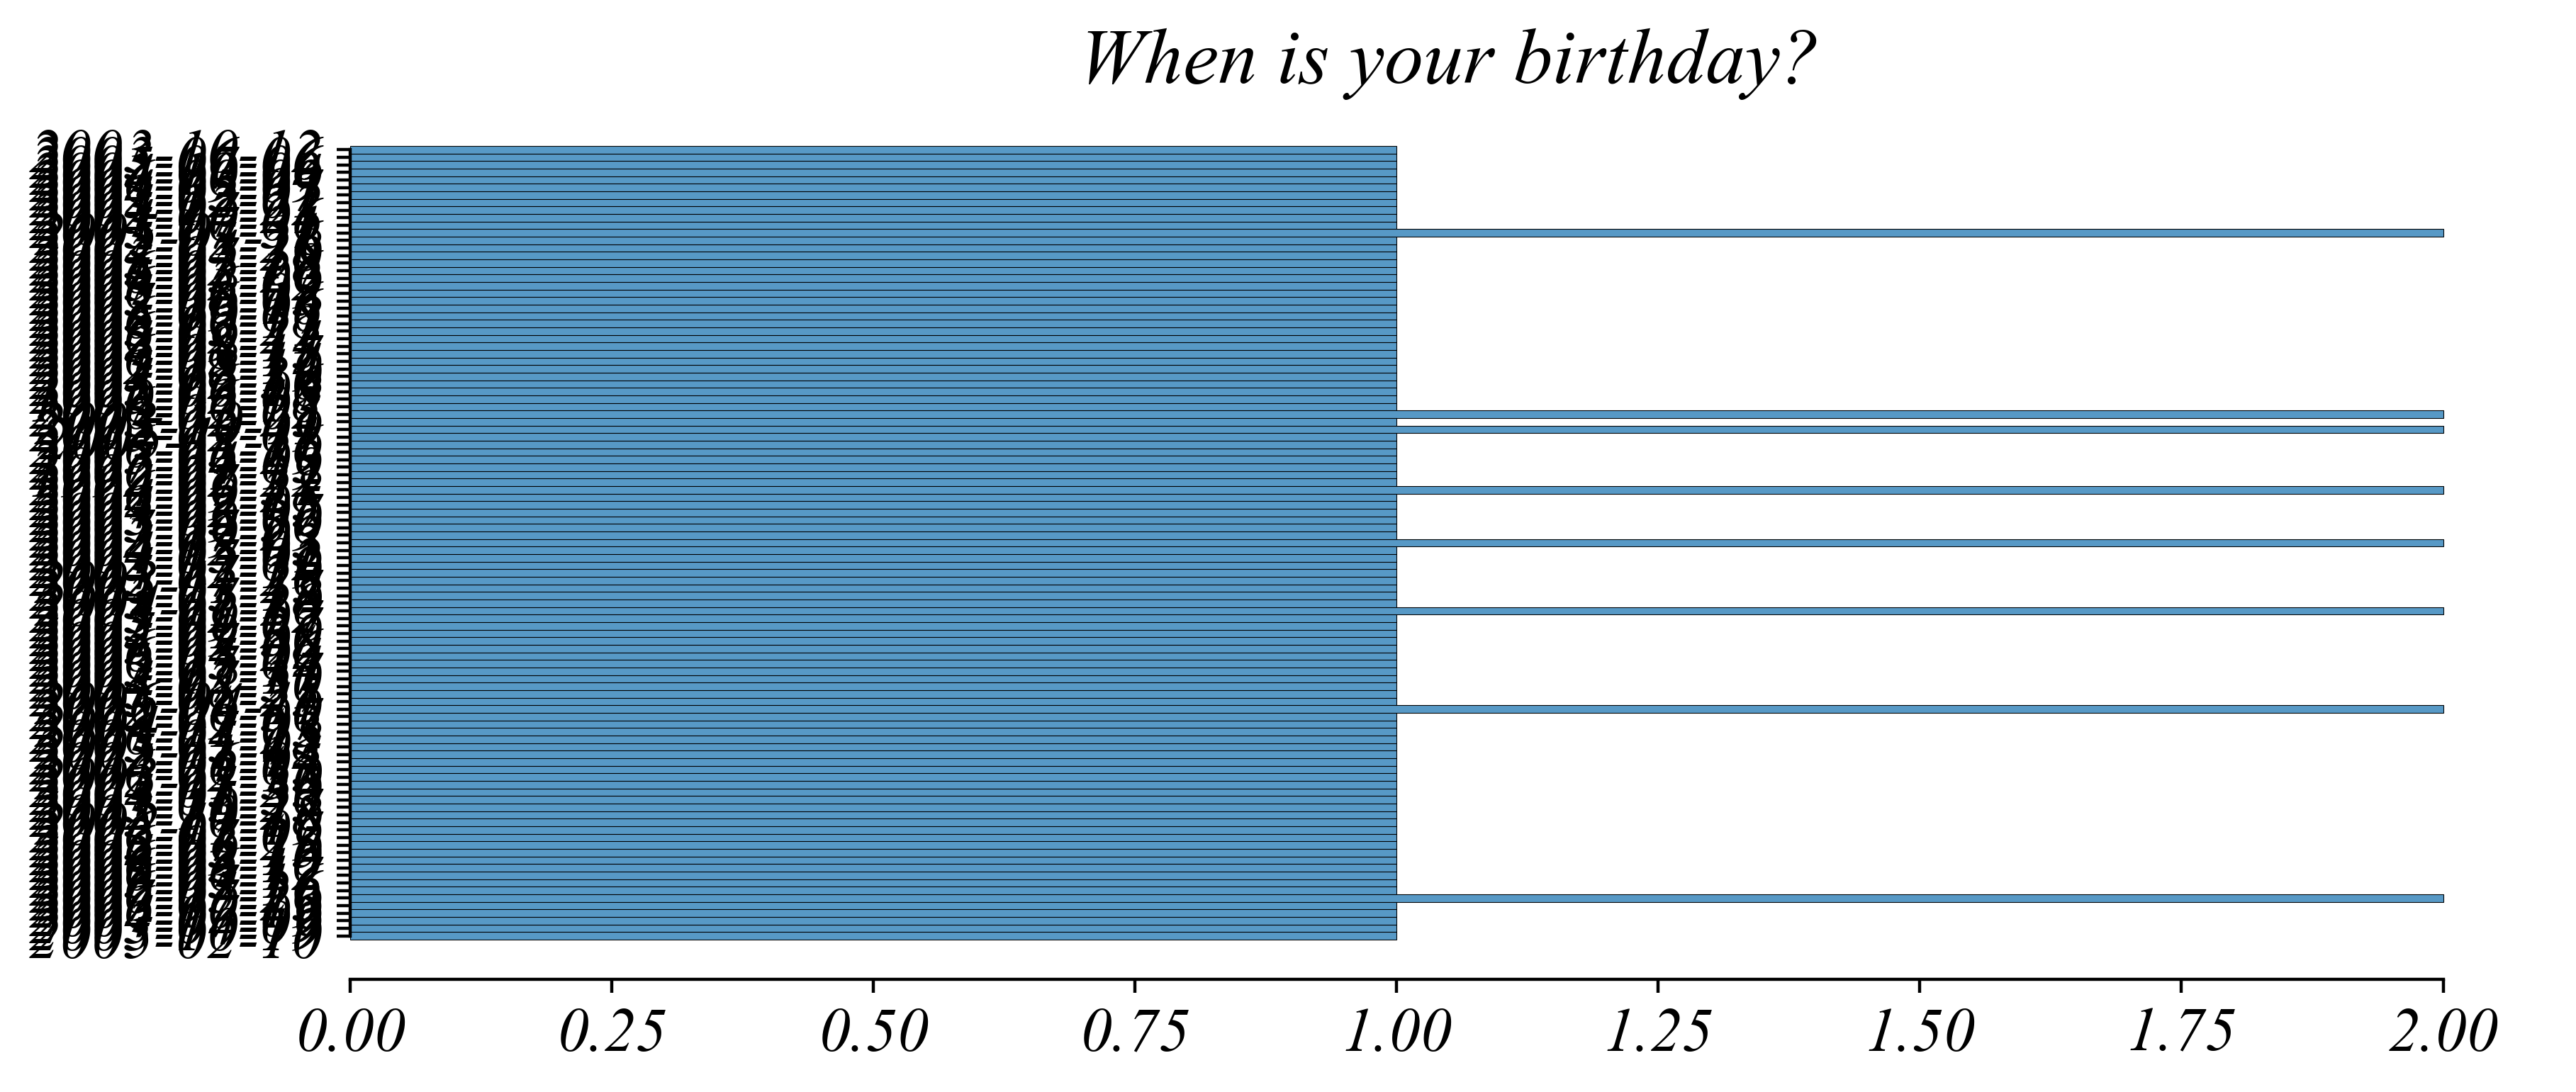

In [19]:
data = pd.read_csv('../part-0/data/Fall_2025_Survey_raw.csv')

# Figure
plt.figure(figsize=(10,4))
sns.histplot(data, y='When is your birthday?')

# Styling
sns.despine(top=True, right=True, trim=True)
plt.xlabel('')
plt.ylabel('')
plt.title('When is your birthday?')

# Save Figure
plt.savefig('i/c_01.png')

In [18]:
data = pd.read_csv('../part-0/data/Fall_2025_Survey_raw.csv').sample(10)

# Figure
plt.figure(figsize=(10,4))
sns.histplot(data, y='When is your birthday?')

# Styling
sns.despine(top=True, right=True, trim=True)
plt.xlabel('')
plt.ylabel('')
plt.title('When is your birthday?')

# Save Figure
plt.savefig('i/c_02.png')

In [62]:
data = pd.read_csv('../part-0/data/Fall_2025_Survey_raw.csv')
data['birthday'] = pd.to_datetime(data['When is your birthday?']).dt.year

# Figure
plt.figure(figsize=(10,4))
sns.histplot(data, x='birthday', bins=range(2001,2010,1))

# Styling
sns.despine(top=True, right=True, trim=True)
plt.xlabel('')
plt.ylabel('')
plt.title('When is your birthday?')

# Save Figure
plt.savefig('i/c_03.png')

#### Cleaning Type 2: Data Type Conversion

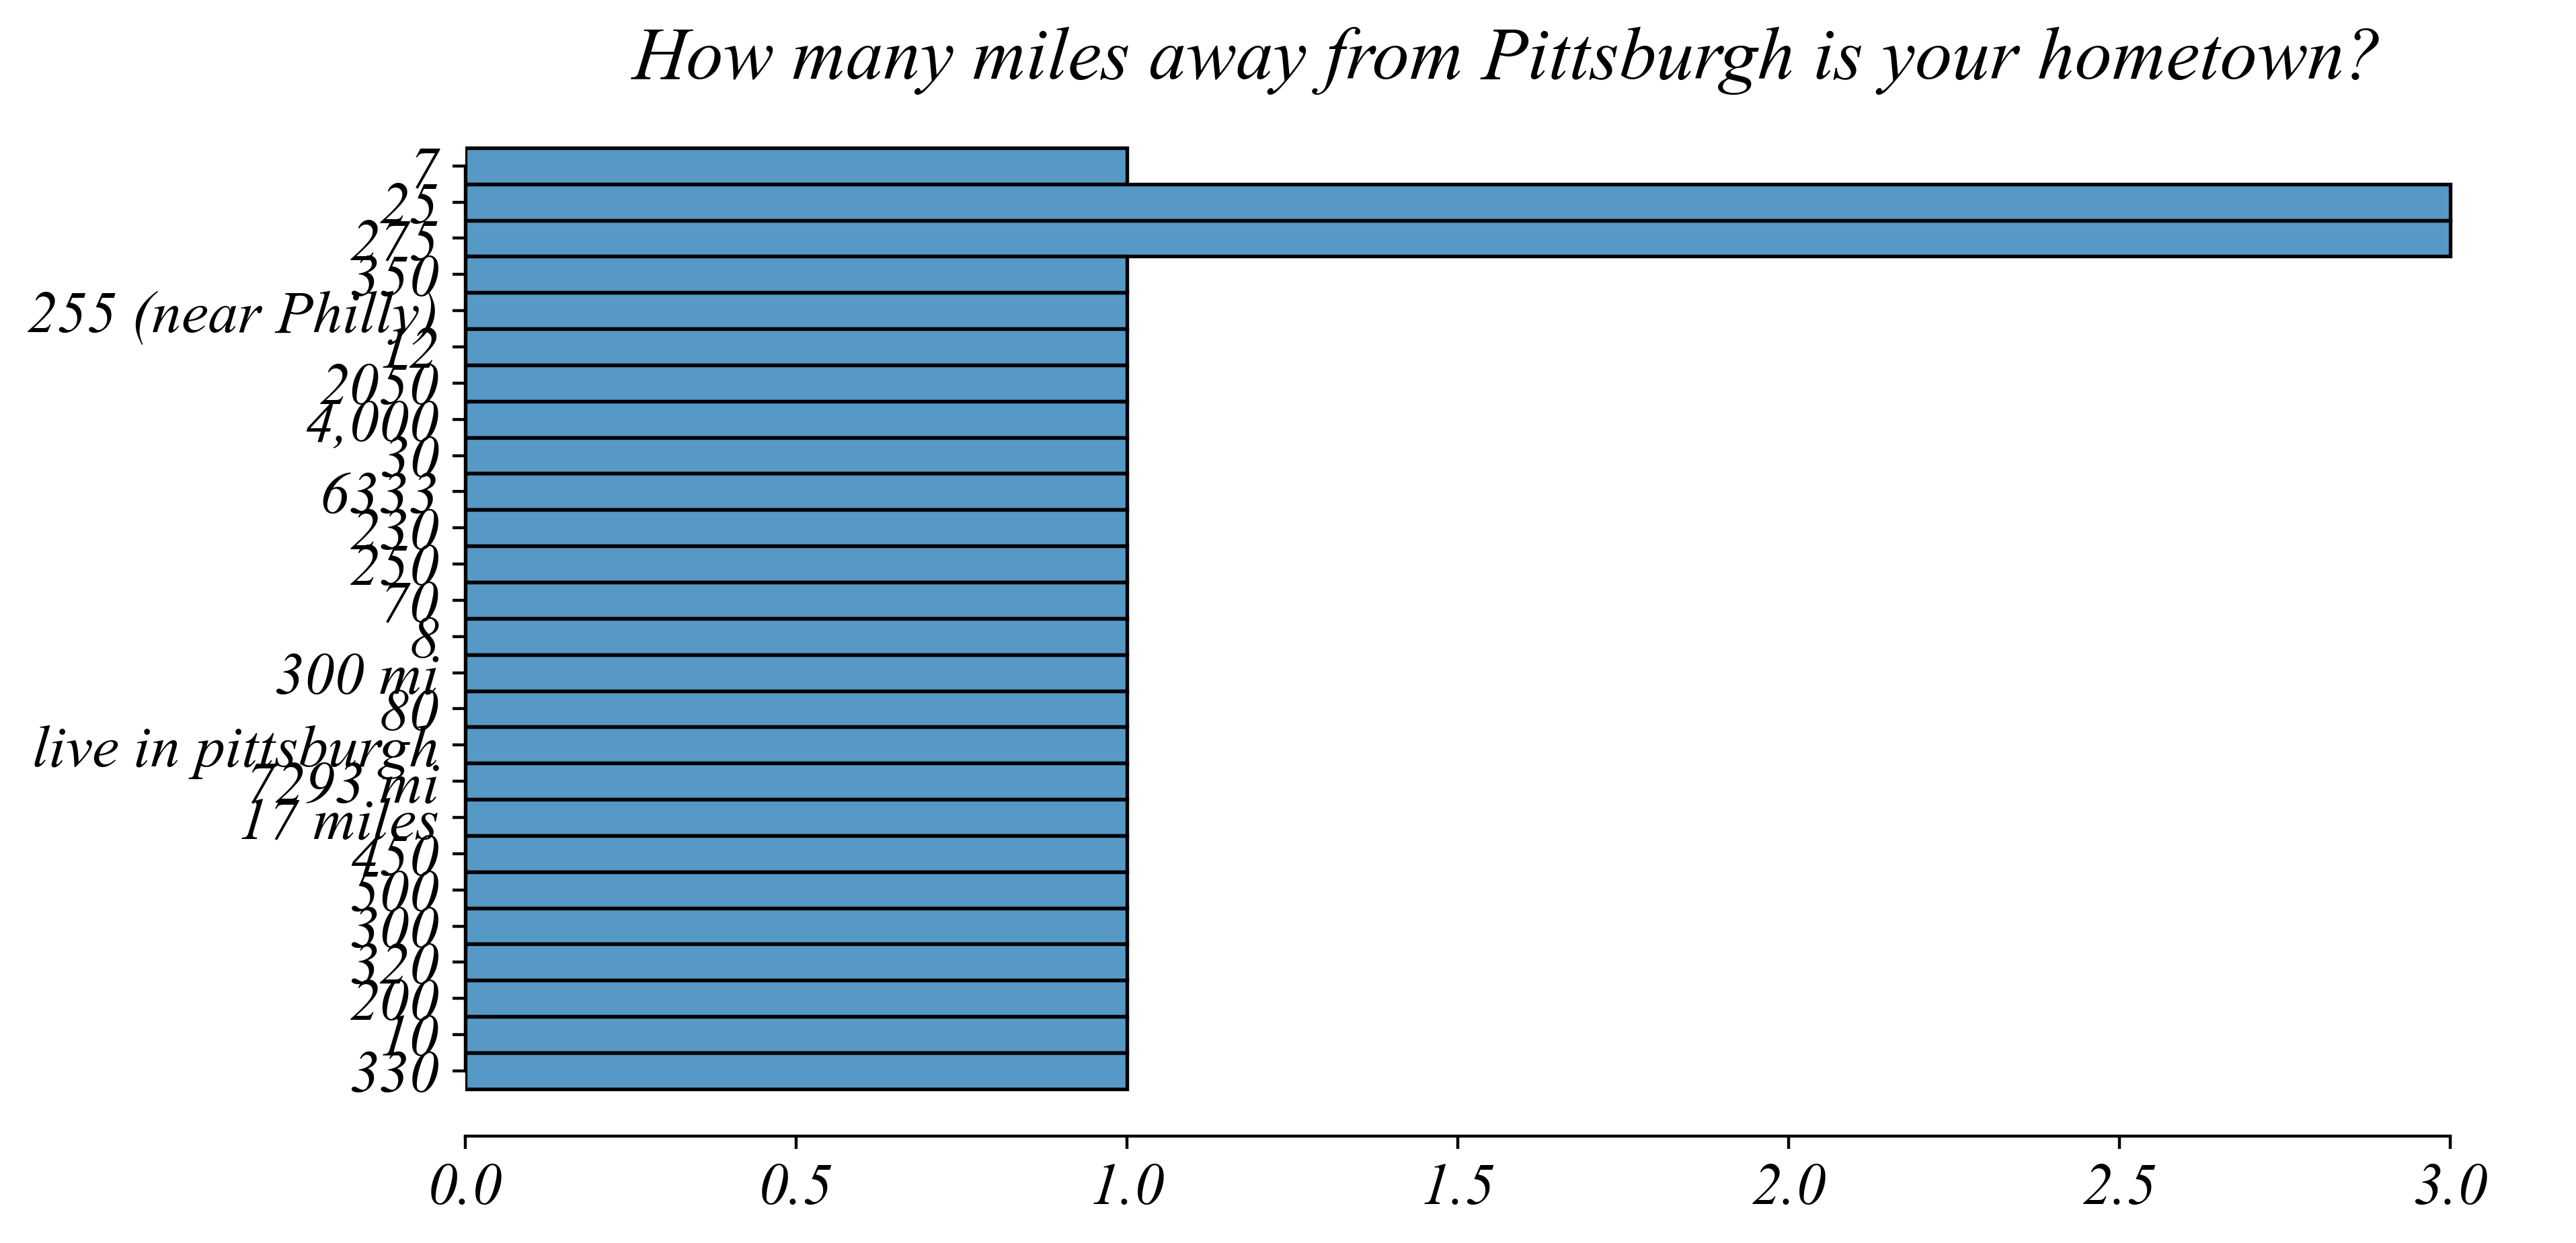

In [69]:
data = pd.read_csv('../part-0/data/Fall_2025_Survey_raw.csv').sample(30)

# Figure
plt.figure(figsize=(10,5))
sns.histplot(data, y='Approximately how many miles away from Pittsburgh is your hometown?')

# Styling
sns.despine(top=True, right=True, trim=True)
plt.xlabel('')
plt.ylabel('')
plt.title('How many miles away from Pittsburgh is your hometown?')

# Save Figure
plt.savefig('i/c_04.png')

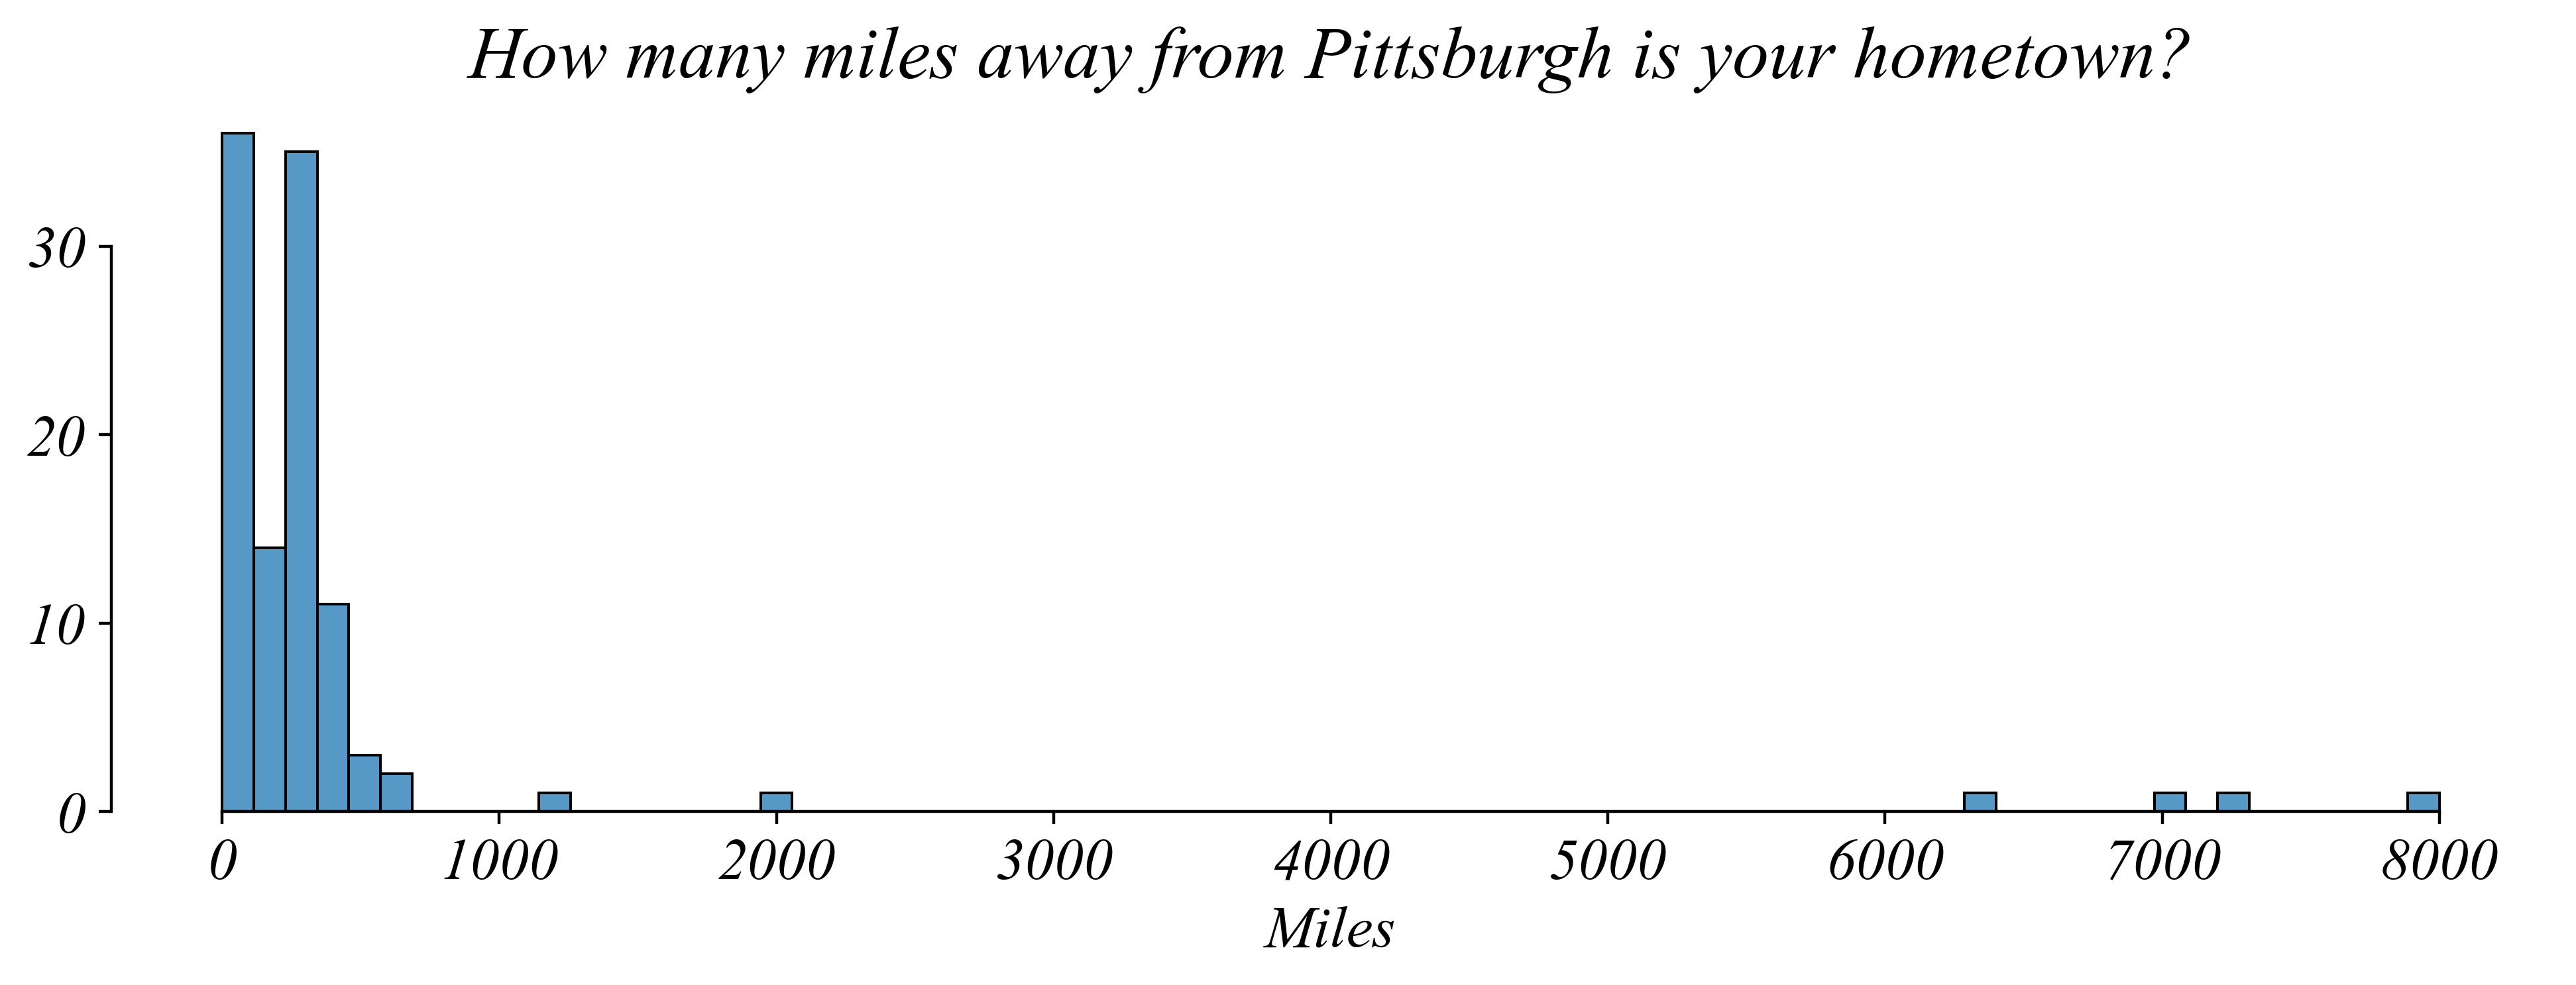

In [179]:
data = pd.read_csv('../part-0/data/Fall_2025_Survey_raw.csv')
data['distance'] = data['Approximately how many miles away from Pittsburgh is your hometown?'].fillna('').str.split().str[0]
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')

# Figure
plt.figure(figsize=(10,4))
sns.histplot(data, x='distance')

# Styling
sns.despine(top=True, right=True, trim=True)
plt.xlabel('Miles')
plt.ylabel('')
plt.title('How many miles away from Pittsburgh is your hometown?')
plt.tight_layout()

# Save Figure
plt.savefig('i/c_05.png')

#### Cleaning Type 3: Handling Missing Values

In [132]:
data = pd.read_csv('../part-0/data/Fall_2025_Survey_raw.csv')
data['distance'] = data['Approximately how many miles away from Pittsburgh is your hometown?']
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')

In [133]:
data[['distance', 'Approximately how many miles away from Pittsburgh is your hometown?']].head()

distance  \
0     400.0   
1      16.0   
2     300.0   
3     300.0   
4     400.0   

  Approximately how many miles away from Pittsburgh is your hometown?  
0                                                400                   
1                                                 16                   
2                                                300                   
3                                                300                   
4                                                400

In [134]:
subdata = data[~(data['distance']>0)]
subdata[['distance', 'Approximately how many miles away from Pittsburgh is your hometown?']].head()

distance  \
6        NaN   
17       NaN   
18       NaN   
22       NaN   
23       NaN   

   Approximately how many miles away from Pittsburgh is your hometown?  
6                                      176 miles away                   
17                                0 (it’s Pittsburgh)                   
18                                  400-450ish miles                    
22                                          350 miles                   
23                                          240 miles

In [137]:
data = pd.read_csv('../part-0/data/Fall_2025_Survey_raw.csv')
data['distance'] = data['Approximately how many miles away from Pittsburgh is your hometown?']
data['distance'] = data['distance'].fillna('').str.split().str[0]
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')

subdata = data[~(data['distance']>0)]
subdata[['distance', 'Approximately how many miles away from Pittsburgh is your hometown?']].head()

distance  \
17       0.0   
18       NaN   
33       0.0   
55       NaN   
67       NaN   

   Approximately how many miles away from Pittsburgh is your hometown?  
17                                0 (it’s Pittsburgh)                   
18                                  400-450ish miles                    
33                                                  0                   
55                                                NaN                   
67                                 live in pittsburgh

In [135]:
data = data.dropna()
data[['distance', 'Approximately how many miles away from Pittsburgh is your hometown?']].head()

distance  \
0     400.0   
1      16.0   
2     300.0   
3     300.0   
4     400.0   

  Approximately how many miles away from Pittsburgh is your hometown?  
0                                                400                   
1                                                 16                   
2                                                300                   
3                                                300                   
4                                                400

In [136]:
subdata = data[~(data['distance']>0)]
subdata[['distance', 'Approximately how many miles away from Pittsburgh is your hometown?']].head()

distance  \
33       0.0   
91       0.0   
97       0.0   

   Approximately how many miles away from Pittsburgh is your hometown?  
33                                                  0                   
91                                                  0                   
97                                                  0

In [125]:
data = pd.read_csv('../part-0/data/Fall_2025_Survey_raw.csv')
data['distance'] = data['Approximately how many miles away from Pittsburgh is your hometown?']

replacements = {
    '400-450ish miles ': 400, 
    'live in pittsburgh': 0,
    '176 miles away': 176,
    '0 (it’s Pittsburgh)': 0,
    '350 miles': 350,
    '240 miles': 240,
    '388 miles': 388,
    '17 miles': 17,
    '300 miles': 300,
    '7293 mi': 7293,
    '4 miles ': 4,
    '27 miles': 27,
    '255 (near Philly)': 255,
    '4,000': 4000,
    '650 miles': 650,
    '250 miles': 250,
    '318 mi': 318,
    '300 mi': 300,
    '1000+': 1000,
    '305 miles': 305
}
data['distance'] = data['distance'].replace(replacements)
data['distance'] = pd.to_numeric(data['distance'])

#### Final Figure

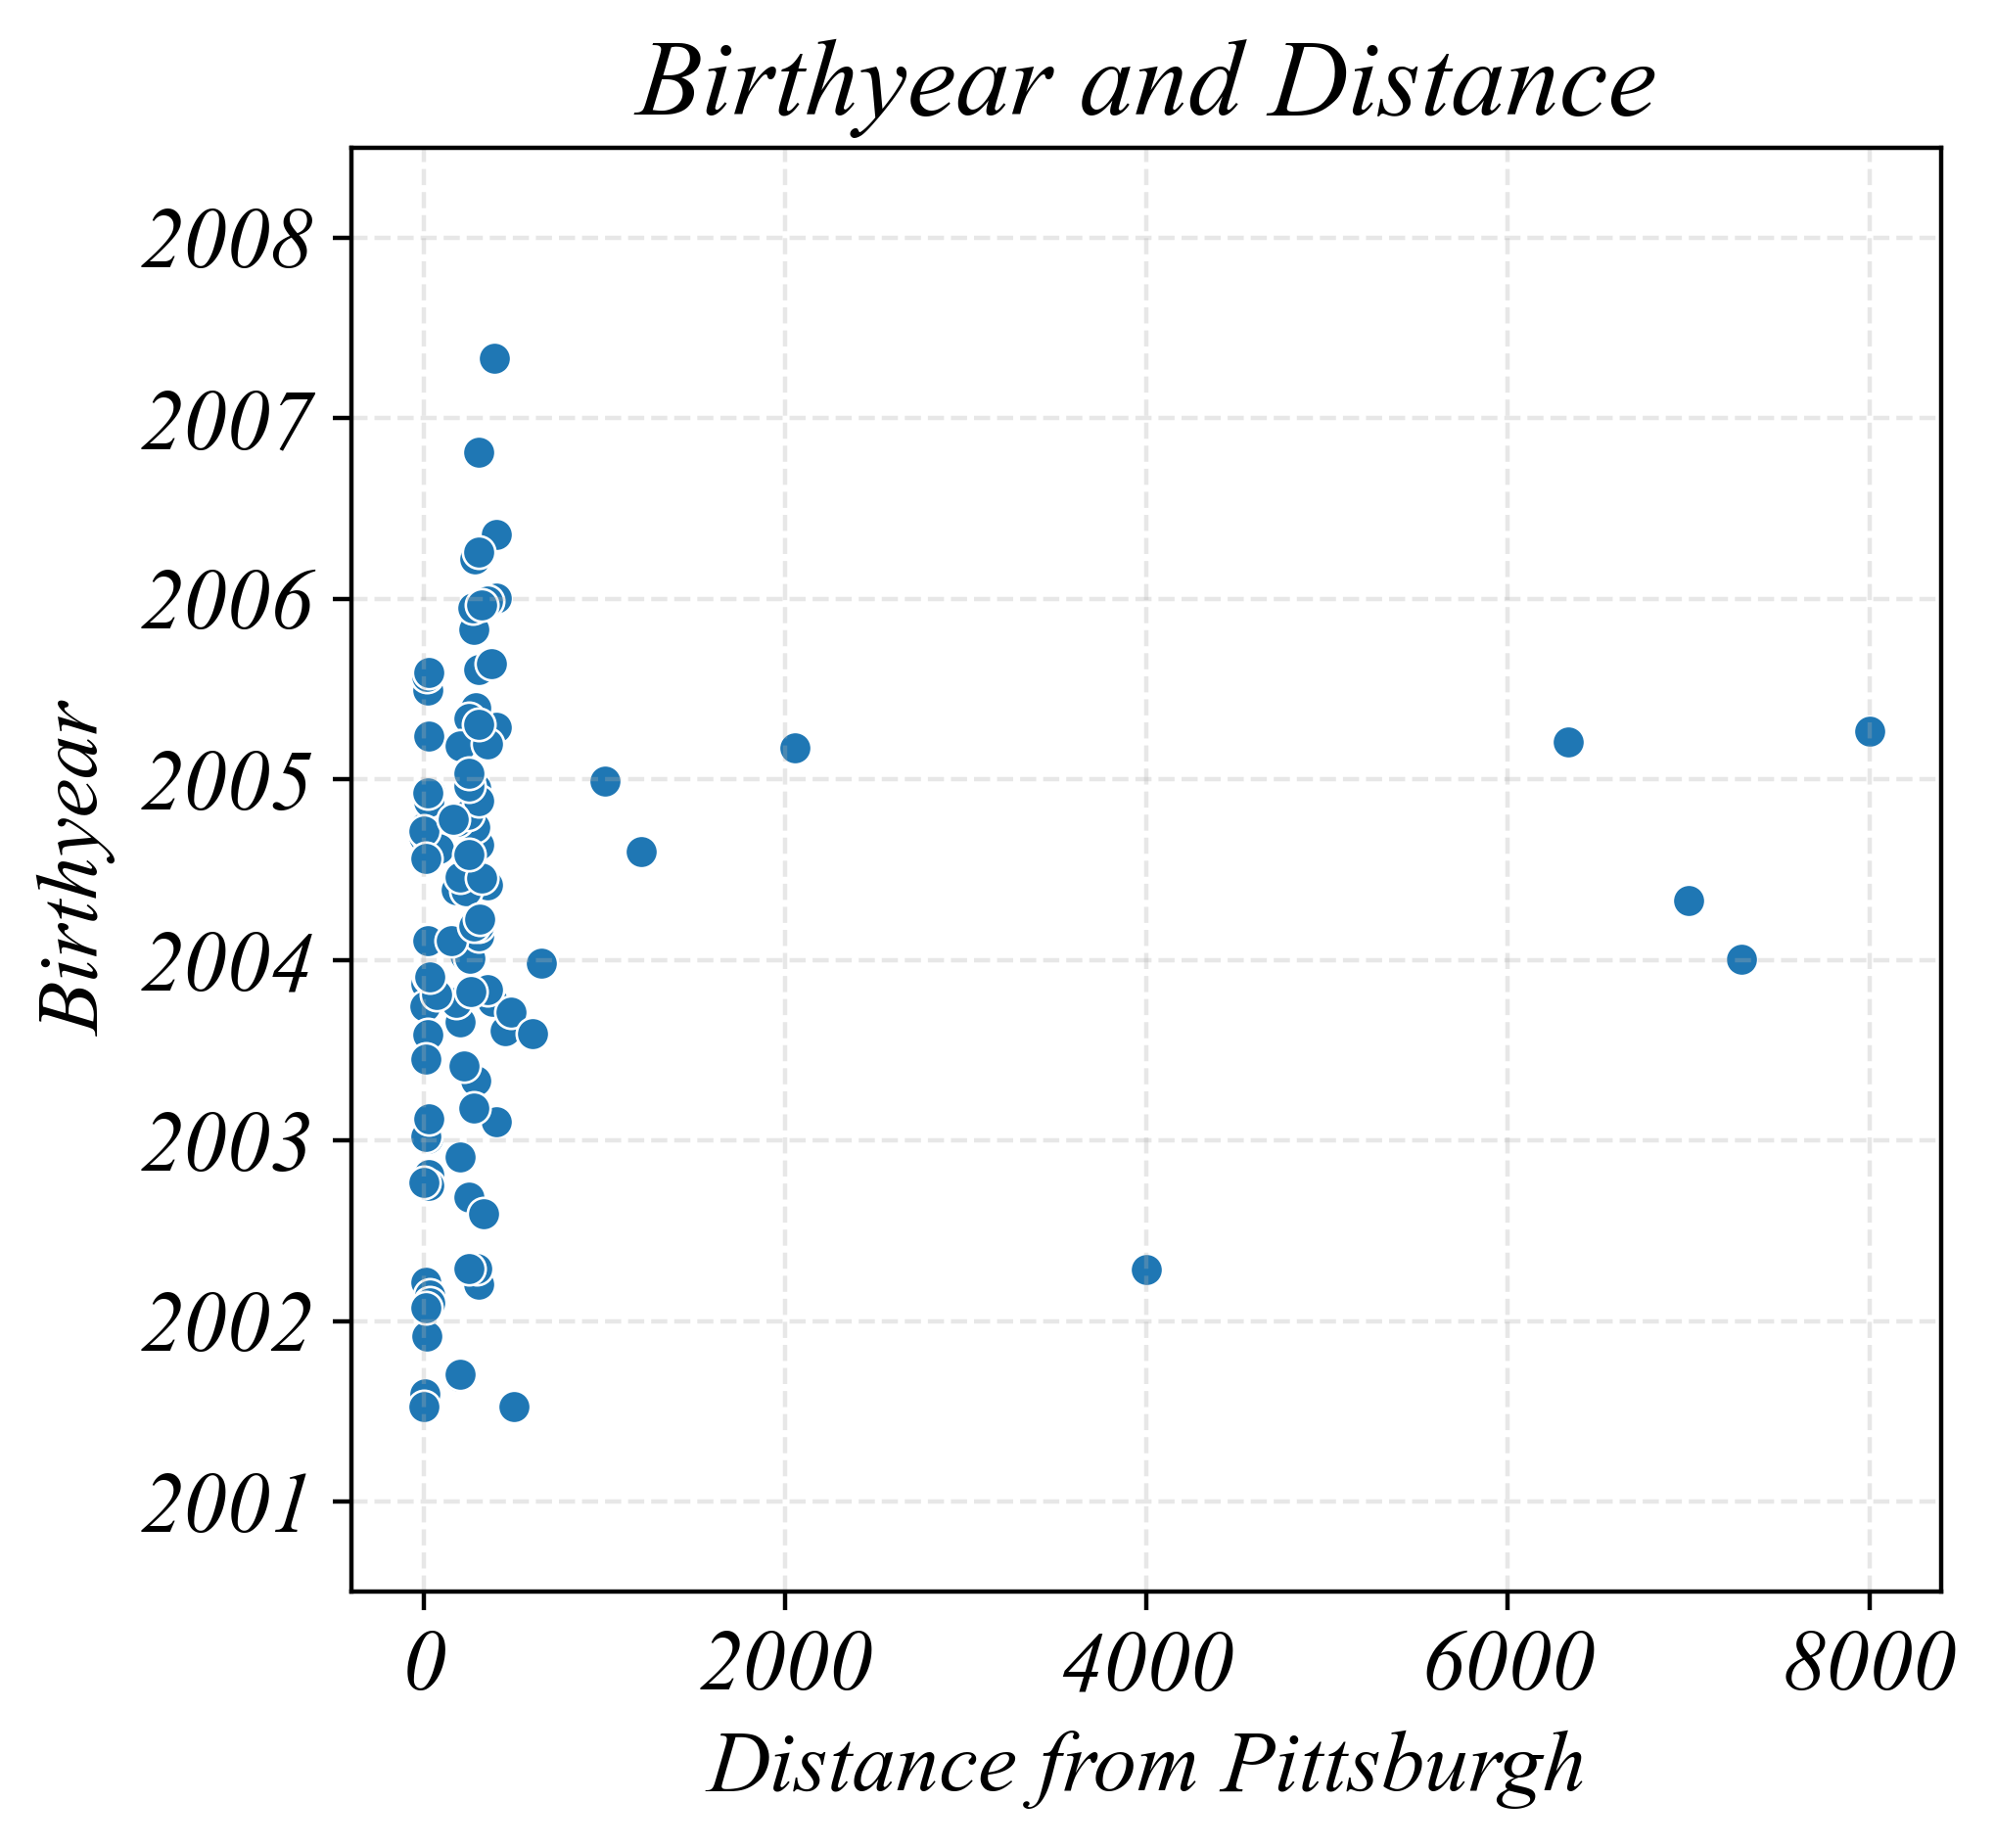

In [199]:
data = pd.read_csv('../part-0/data/Fall_2025_Survey_raw.csv')
data['distance'] = data['Approximately how many miles away from Pittsburgh is your hometown?']

replacements = {
    '400-450ish miles ': 400, 
    'live in pittsburgh': 0,
    '176 miles away': 176,
    '0 (it’s Pittsburgh)': 0,
    '350 miles': 350,
    '240 miles': 240,
    '388 miles': 388,
    '17 miles': 17,
    '300 miles': 300,
    '7293 mi': 7293,
    '4 miles ': 4,
    '27 miles': 27,
    '255 (near Philly)': 255,
    '4,000': 4000,
    '650 miles': 650,
    '250 miles': 250,
    '318 mi': 318,
    '300 mi': 300,
    '1000+': 1000,
    '305 miles': 305
}
data['distance'] = data['distance'].replace(replacements)
data['distance'] = pd.to_numeric(data['distance'])

data['birthday'] = pd.to_datetime(data['When is your birthday?']).dt.year + np.random.normal(-0.5,0.5,len(data))

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(data=data, y='birthday', x='distance', ax=ax)

# Styling
ax.set_yticks(range(2001, 2009, 1))
ax.set_ylim(2000.5, 2008.5)
ax.set_ylabel('Birthyear')
ax.set_xlabel('Distance from Pittsburgh')
plt.title('Birthyear and Distance')
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_06.png')

In [196]:

np.random.normal(0,1,100)

array([-8.52354583e-01,  1.01843704e+00,  1.15753020e+00,  8.26243284e-01,
       -5.61743922e-03, -4.72250271e-01, -4.13488381e-01, -3.62007277e-01,
       -5.29200081e-01, -3.19424472e-01, -8.63974195e-01, -2.08928179e+00,
       -8.34150552e-01, -2.83525010e-02,  1.57547129e+00,  7.58059192e-01,
        2.20032554e-01, -1.10288684e+00,  1.28064163e+00, -3.47190127e-01,
       -2.62110448e+00, -1.08464596e+00,  1.32750283e+00,  5.70909875e-01,
       -8.66340500e-01, -3.68667921e-01, -5.59208998e-01, -1.13880184e+00,
        1.11202470e-01,  5.63363909e-01,  3.02112290e-01,  3.90936462e-01,
        1.84401916e-01,  1.69721467e+00, -8.68320179e-01, -1.07646697e+00,
        3.04163079e-01,  1.54746032e-02, -3.75152942e-01, -1.22742036e+00,
        4.15996738e-01, -7.47746114e-01,  2.52367590e+00,  7.48002296e-01,
        1.38167040e+00,  5.35044528e-01, -4.83100828e-01, -2.26067671e-01,
        1.12313653e+00, -5.31884117e-01,  1.56946643e-01,  1.11452892e+00,
        1.37558790e+00, -

## Homework

In [2]:
prices = pd.read_csv('data/Monthly_Coffee_Prices_All.csv')
prices['year'] = pd.to_datetime(prices['date']).dt.year
prices = prices[prices['year'] > 2005]
prices.to_csv('data/Monthly_Coffee_Prices.csv')

In [7]:
gmt = pd.read_csv('data/Starbucks_Location_Hours_raw.csv', index_col=0)
gmt['olsonTimeZoneId'] = gmt['olsonTimeZoneId'].str.split(':').str[0]
gmt.to_csv('data/Starbucks_Location_Hours_GMT.csv')